In [22]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
from include.loss import pixel_weighted_cross_entropy
import model_eval

import matplotlib_functions

matplotlib_functions.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"

<Figure size 1920x1440 with 0 Axes>

In [17]:
# Berlin
name_case = "models/seg_2km_64_ber_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Ber/2d_valid_dataset.nc"

In [28]:
# Lippendorf
name_case = "models/seg_2km_64_lip_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Lip/2d_valid_dataset.nc"

In [76]:
# Patnow
name_case = "/cerea_raid/users/dumontj/dev/coco2/dl/res/segmentation/seg_pat_no_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Pat/2d_train_dataset.nc"

In [108]:
# Turow
name_case = "/cerea_raid/users/dumontj/dev/coco2/dl/res/segmentation/seg_tur"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Tur/2d_train_dataset.nc"

In [109]:
data = model_eval.get_data_for_segmentation(
    os.path.join(dir_res, name_case),
    path_eval_nc,
)

model = model_eval.get_segmentation_model(
    os.path.join(dir_res, name_case), name_w="w_best.h5"
)

data.y.train.shape (6289, 64, 64, 1)


In [110]:
#data.x.eval[:,:,44:,-1] = data.x.eval[:,:, :20,-1]

In [111]:
wbce = model_eval.get_wbce_model_on_data(model, data)
print(np.mean(wbce))

197/197 [==============================] - 1s 6ms/step
0.17385226


In [91]:
nwbce = model_eval.get_nwbce_model_on_data(model, data)
print(np.mean(nwbce))

197/197 [==============================] - 1s 7ms/step
0.62156564


nwbce: 0.14074542
idx 2123
origin: smart_2km_Tur_64
time: 2015-05-01T11:00:00.000000000
emiss: [ 9.973179  9.973142 10.05557   9.808351  8.901839  7.583303]
nwbce: 0.19065289
idx 405
origin: smart_2km_Tur_64
time: 2015-01-25T21:00:00.000000000
emiss: [8.693694 8.779965 8.78003  8.95232  9.210575 9.468761]
nwbce: 0.16456363
idx 2758
origin: smart_2km_Tur_64
time: 2015-06-08T22:00:00.000000000
emiss: [7.628364 8.025716 8.105258 8.105292 8.264255 8.502733]


<Figure size 1920x1440 with 0 Axes>

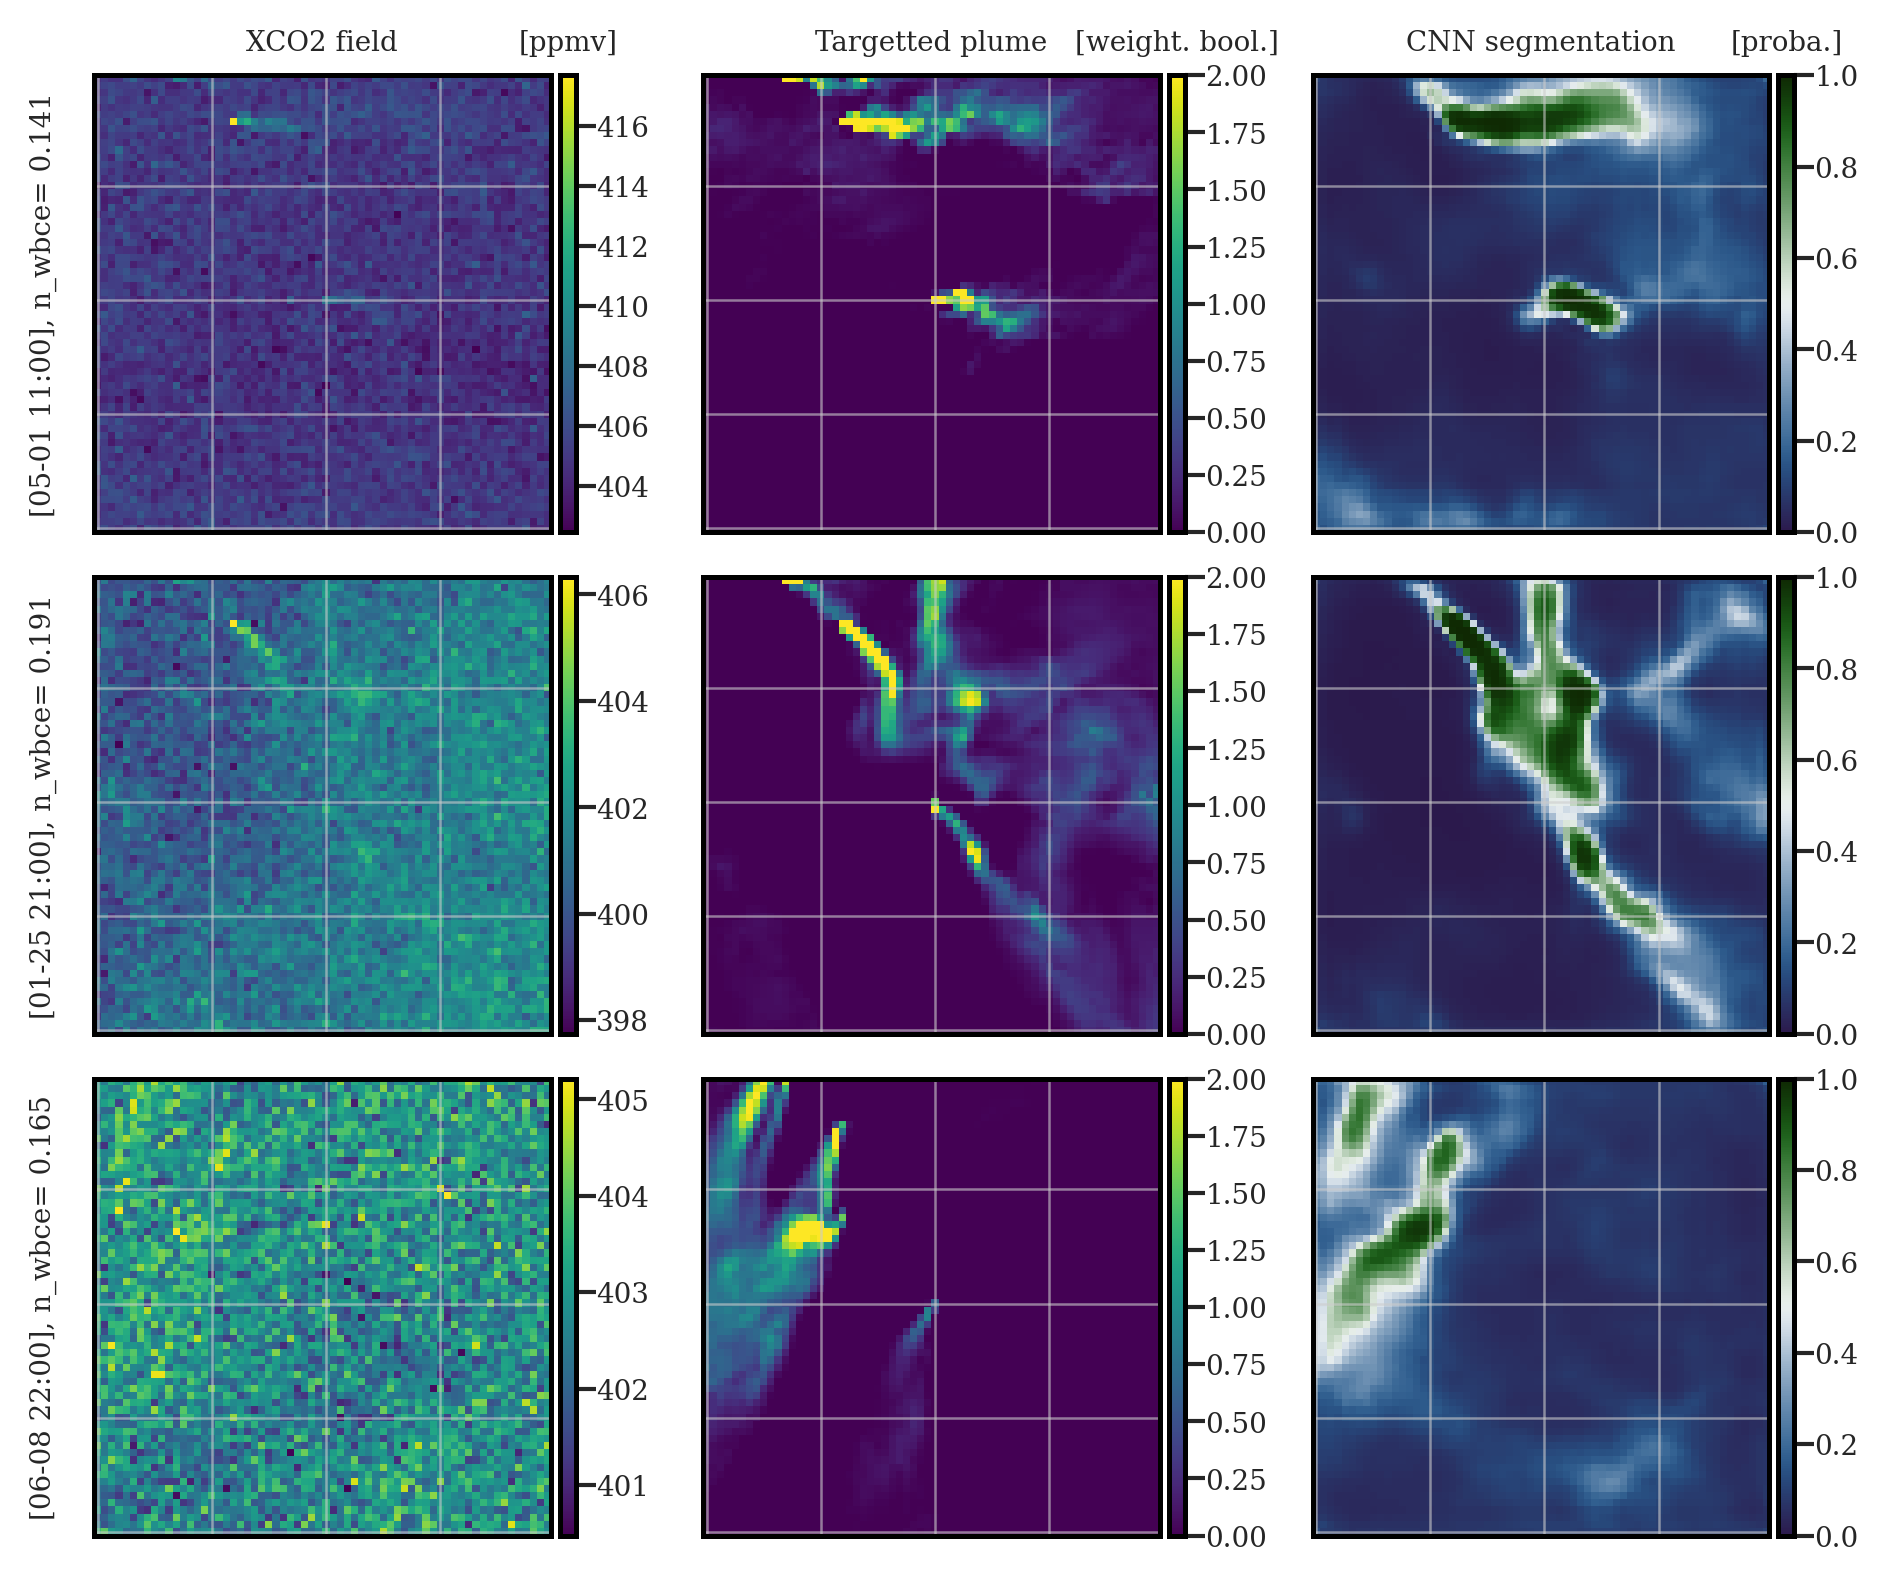

In [104]:
model_eval.plot_segmentation_examples(data, wbce, model, no2=False)